In [149]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [150]:
# Load Dataset

data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Basic Exploration

In [151]:
# Shape of Dataframe

print(data.shape)

(17379, 17)


In [152]:
# Check column data types

data.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [153]:
# Summary statistics for columns

data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Preprocessing


In [154]:
# Check for Missing values

print(data.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [155]:
# Check for duplicates

print(data.duplicated().sum())

0


In [156]:
# Drop columns

data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# Exploratory Data Analysis

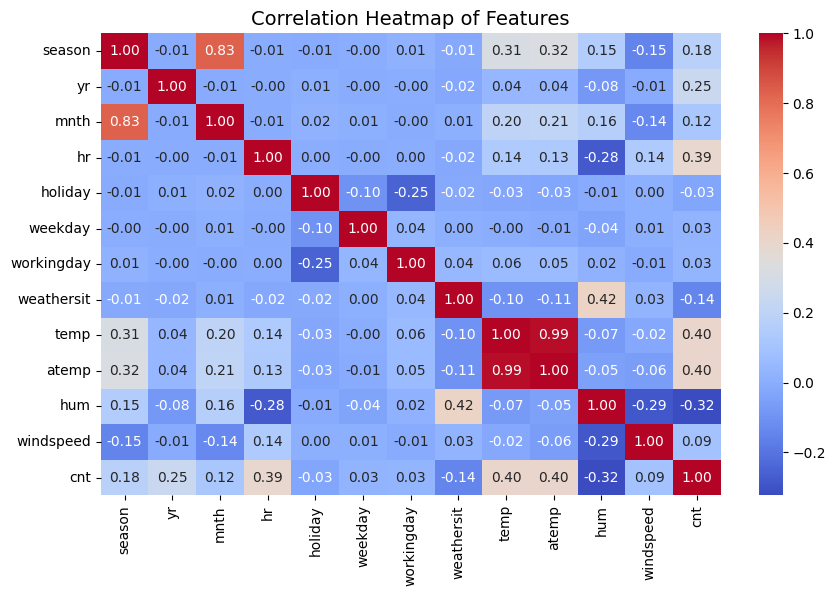

In [157]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

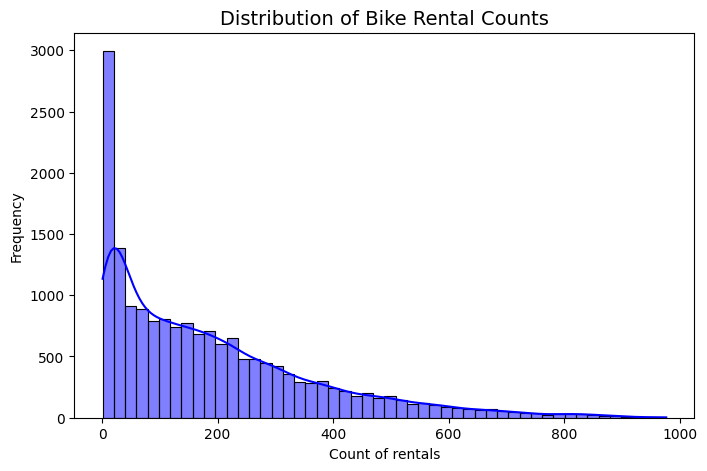

In [158]:
# Target Distribution

plt.figure(figsize=(8,5))
sns.histplot(data['cnt'], kde=True, bins=50, color="blue")
plt.title("Distribution of Bike Rental Counts", fontsize=14)
plt.xlabel("Count of rentals")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-842952387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=data, palette="Set1")


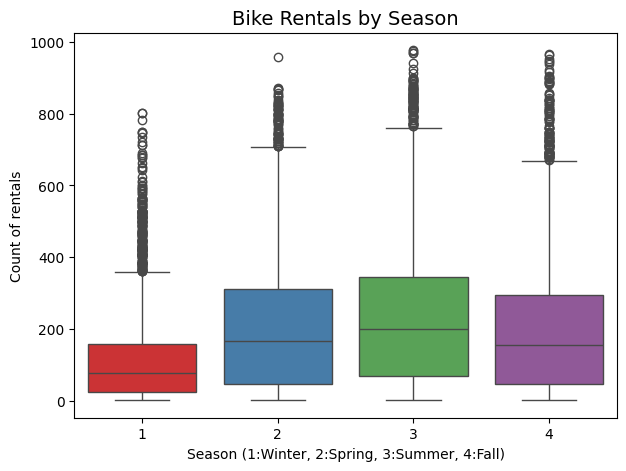

In [159]:
# Rentals by Season

plt.figure(figsize=(7,5))
sns.boxplot(x="season", y="cnt", data=data, palette="Set1")
plt.title("Bike Rentals by Season", fontsize=14)
plt.xlabel("Season (1:Winter, 2:Spring, 3:Summer, 4:Fall)")
plt.ylabel("Count of rentals")
plt.show()

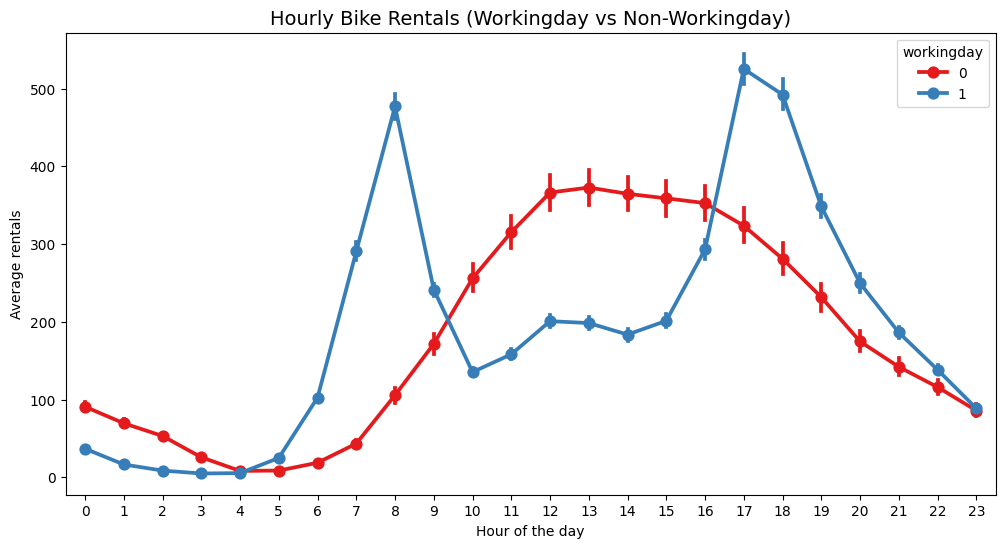

In [160]:
# Rentals by hour

plt.figure(figsize=(12,6))
sns.pointplot(x="hr", y="cnt", data=data, hue="workingday", palette="Set1")
plt.title("Hourly Bike Rentals (Workingday vs Non-Workingday)", fontsize=14)
plt.xlabel("Hour of the day")
plt.ylabel("Average rentals")
plt.show()

/tmp/ipython-input-783057839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=data, palette="coolwarm")


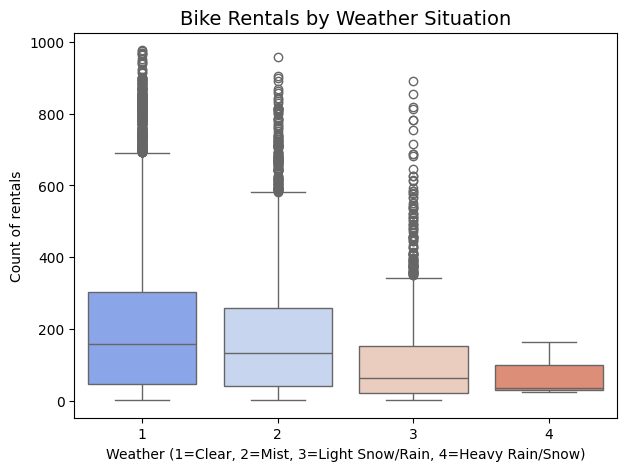

In [161]:
# Effect of Weather

plt.figure(figsize=(7,5))
sns.boxplot(x="weathersit", y="cnt", data=data, palette="coolwarm")
plt.title("Bike Rentals by Weather Situation", fontsize=14)
plt.xlabel("Weather (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Heavy Rain/Snow)")
plt.ylabel("Count of rentals")
plt.show()

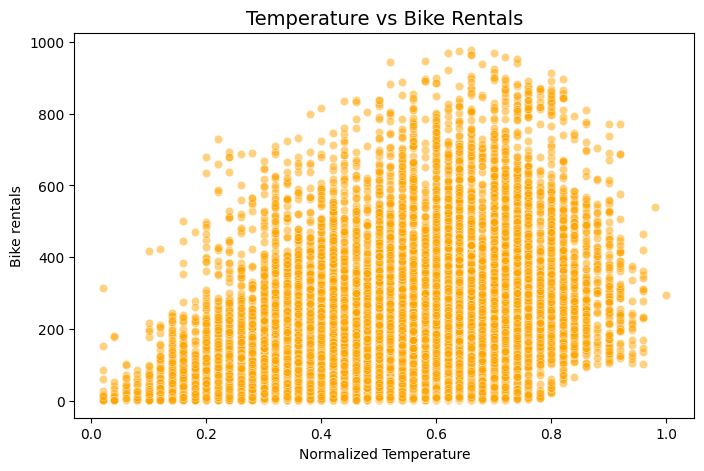

In [162]:
# Temperature vs Rentals

plt.figure(figsize=(8,5))
sns.scatterplot(x="temp", y="cnt", data=data, alpha=0.5, color="orange")
plt.title("Temperature vs Bike Rentals", fontsize=14)
plt.xlabel("Normalized Temperature")
plt.ylabel("Bike rentals")
plt.show()

# Models

In [163]:
# Split data

X = data.drop(["cnt"], axis=1)
y = data["cnt"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

# Scale numerical features
scaler = StandardScaler()
num_cols = ["temp", "atemp", "hum", "windspeed"]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (13903, 12) Test size: (3476, 12)


In [164]:
# Function for mean absolute percentage error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-5))) * 100


## Linear Regression Model

In [165]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [166]:
# Performance Evaluation

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)


print(f"Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}%")

Linear Regression Performance:
RMSE: 141.77
MAE: 106.34
R²: 0.40
MAPE: 356.55%


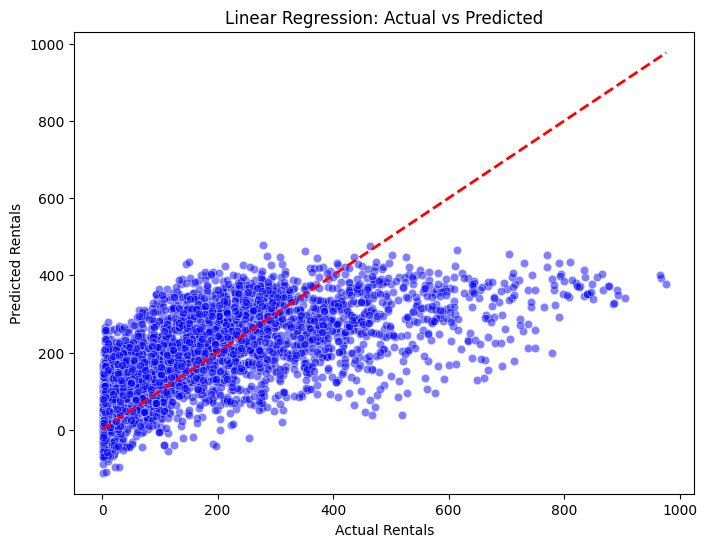

In [167]:
# Actual vs Predicted plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

## Random Forest Model

In [168]:
# Random Forest

rf = RandomForestRegressor(n_estimators=200, random_state=4)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [169]:
# Performance Evaluation

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")

Random Forest Performance:
RMSE: 42.46
MAE: 25.40
R²: 0.95
MAPE: 31.36%


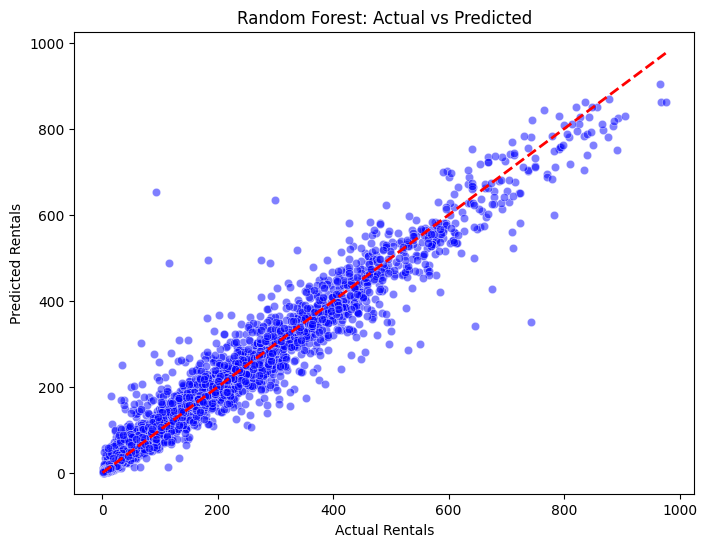

In [170]:
# Actual vs Predicted plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

## Gradient Boosting Regressor Model

In [171]:
# Gradient Boosting Regressor

gb = GradientBoostingRegressor(n_estimators=200, random_state=5)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [172]:
# Performace Evaluation

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAE: {mae_gb:.2f}")
print(f"R²: {r2_gb:.2f}")
print(f"MAPE: {mape_gb:.2f}%")

Gradient Boosting Performance:
RMSE: 56.48
MAE: 38.12
R²: 0.90
MAPE: 84.69%


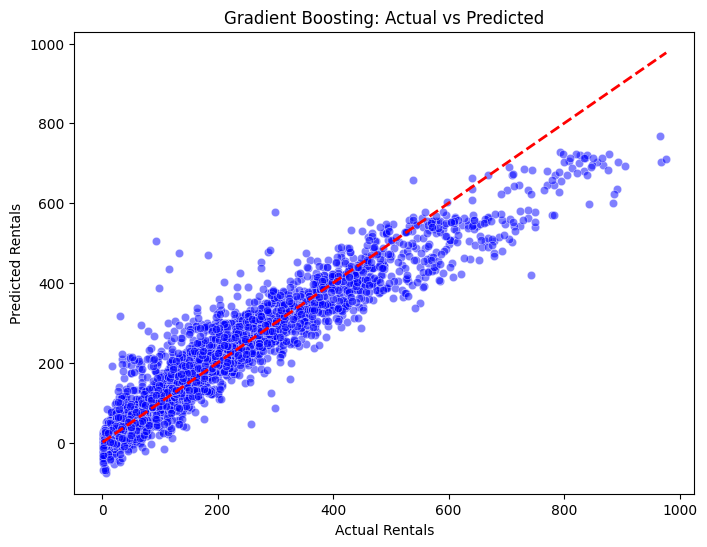

In [173]:
# Actual vs Predicted plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

## XGBoost Regressor Model

In [174]:
# XGBoost Regressor

xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=6)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [175]:
# Performace Evaluation

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

XGBoost Performance:
RMSE: 39.90
MAE: 24.57
R²: 0.95
MAPE: 38.43%


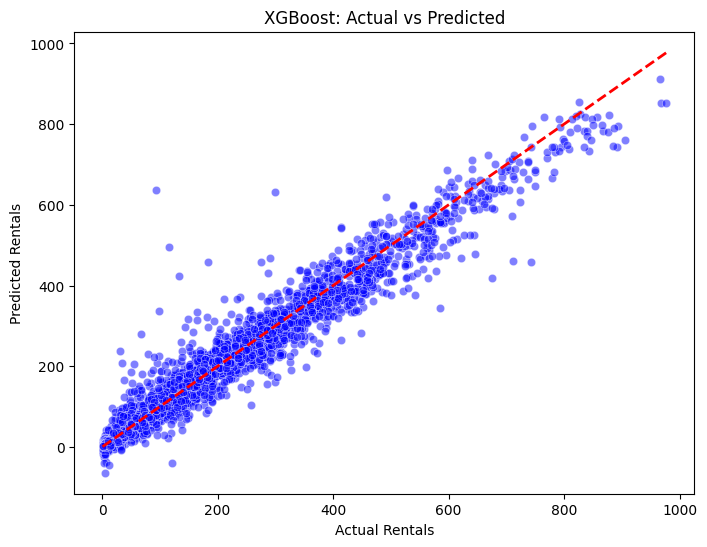

In [176]:
# Actual vs Predicted Plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

## Neural Network Model

In [177]:
# Neural Network

mlp = MLPRegressor(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


In [178]:
# Performace Evaluation

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mape_mlp = mean_absolute_percentage_error(y_test, y_pred_mlp)

print(f"Neural Network Performance:")
print(f"RMSE: {rmse_mlp:.2f}")
print(f"MAE: {mae_mlp:.2f}")
print(f"R²: {r2_mlp:.2f}")
print(f"MAPE: {mape_mlp:.2f}%")

Neural Network Performance:
RMSE: 47.86
MAE: 31.87
R²: 0.93
MAPE: 78.66%


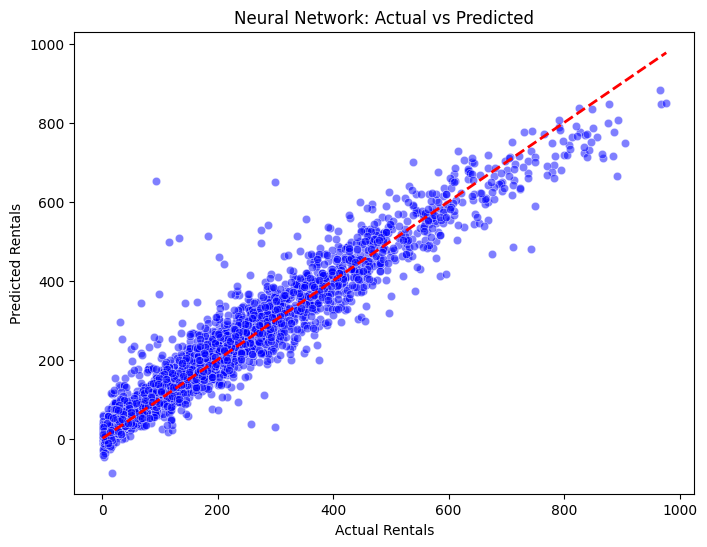

In [179]:
# Actual vs Predicted plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Neural Network: Actual vs Predicted")
plt.show()

In [180]:
# Compare all models

performance = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost", "Neural Network"],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb, rmse_xgb, rmse_mlp],
    "MAE": [mae_lr, mae_rf, mae_gb, mae_xgb, mae_mlp],
    "R2": [r2_lr, r2_rf, r2_gb, r2_xgb, r2_mlp],
    "MAPE (%)": [mape_lr, mape_rf, mape_gb, mape_xgb, mape_mlp]
}

df_perf = pd.DataFrame(performance)
df_perf

,Model,RMSE,MAE,R2,MAPE (%)
0,Linear Regression,141.772027,106.340426,0.397537,356.553097
1,Random Forest,42.460489,25.395362,0.945960,31.361912
2,Gradient Boosting,56.484376,38.117824,0.904367,84.690619
3,XGBoost,39.898457,24.565554,0.952284,38.433410
4,Neural Network,47.864578,31.865407,0.931328,78.660141
